<a href="https://colab.research.google.com/github/gnitish18/Pattern-Audio-Slides/blob/master/SourceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

DATA1 = np.matrix([[1.08,0.75,0.85,0.94,0.40,1.25,1.19,0.99,0.69,1.32],[0.08,-0.19,-0.11,0.01,-0.09,-0.21,0.07,0.04,-0.02,0.02]])
DATA2 = np.matrix([[0.01,-0.01,0.09,-0.05,-0.45,0.07,-0.33,-0.06,-0.33,-0.24],[0.85,1.05,0.93,1.41,1.45,1.20,0.88,1.08,1.10,1.01]])

data = np.matrix([[1.08,0.75,0.85,0.94,0.40,1.25,1.19,0.99,0.69,1.32,0.01,-0.01,0.09,-0.05,-0.45,0.07,-0.33,-0.06,-0.33,-0.24],[0.08,-0.19,-0.11,0.01,-0.09,-0.21,0.07,0.04,-0.02,0.02,0.85,1.05,0.93,1.41,1.45,1.20,0.88,1.08,1.10,1.01]])

t1 = np.full((10),1)
t2 = np.full((10),-1)
t = np.append(t1,t2)
t = t.reshape(-1, 20)

**Part 1**

Kernel Function: $$ K(xi,xj) = (xi)^T(xj)$$

In [0]:
kernel_matrix = np.zeros((20,20))

# Linear Kernel Matrices  
def K(x1,x2,t1,t2):
    output = np.matmul(x1.T,x2)
    return output*t1*t2

# Linear Kernel Function 
def krn(x1,x2):
    output = np.matmul(x1.T,x2)
    return output[0,0]


In [0]:
for i in range(20):
    for j in range(20):
        kernel_matrix[i,j] = K(data[:,i],data[:,j],t[:, i],t[:, j])
kernel_matrix = np.concatenate((kernel_matrix, t), axis=0)

In [0]:
b = np.ones((21, 1))
b[20] = 0

x = np.linalg.pinv(kernel_matrix)

a = np.matmul(x, b)
# print(np.matmul(kernel_matrix,a))
# print(a)

In [5]:
m1 = []
M1 = []

for i in range (20):
  if a[i,0] > 0 and a[i,0] < 10:
    m1.append(i)

m2 = []
for i in range (20):
  if a[i,0] > 0 and a[i,0] < 10:
    m2.append(i)

for i in range (len(m1)):
  M1.append(a[m1[i],0])

print(M1)

[0.09562022458741647, 0.03183160773936618, 0.051099034279988895, 0.07008859227850905, 0.1137410919628345, 0.11344794247018417, 0.0793787901088289, 0.027759788406808632, 0.13320545919712373, 0.05468562885461885, 0.05111918065892555, 0.038722062918134084, 0.04536034602750523, 0.11006349635030008, 0.0327510066424998, 0.10982071280499112, 0.05834828584929598, 0.10226337312517661, 0.09048763936647947]


Printing the set **M1**

In [6]:
w1=w2=0

for i in range(len(m2)):
  #print (data[0,m2[i]]) 
  w1 += a[m2[i],0]*t[0,m2[i]]*data[0,m2[i]] 
  w2 += a[m2[i],0]*t[0,m2[i]]*data[1,m2[i]]
w = np.array([[w1],[w2]])

print(w)

[[ 0.92839993]
 [-0.77654001]]


Printing the weignt matrix, **W**

In [7]:
si = sj = 0

for i in range(len(m1)):
  for j in range(len(m2)):
    sj += a[m2[j],0]*t[0,m2[j]]*krn(data[:,j],data[:,i])
  si += (t[0,m1[i]]-sj)
  sj = 0
b = si/len(m1)

print(b)

0.04953690961144785


Printing the bias, **b**

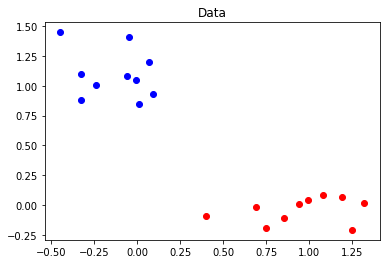

In [8]:
plt.plot(DATA1[0,:], DATA1[1,:], 'ro')
plt.plot(DATA2[0,:], DATA2[1,:], 'bo')
plt.title('Data')
plt.show()

Plotting the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


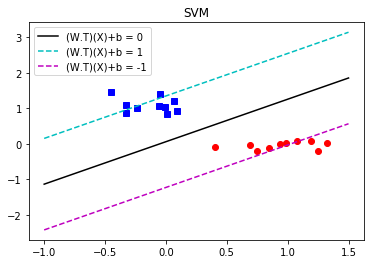

In [9]:
a = -w[0] / w[1]
xx = np.linspace(-1, 1.5)
yy = a * xx - (b) / w[1]
yy1 = a * xx - (1+b) / w[1]
yy2 = a * xx - (-1+b) / w[1]

plt.plot(DATA1[0, :], DATA1[1, :], 'ro')
plt.plot(DATA2[0, :], DATA2[1, :], 'bs')

ax = plt.subplot(111)
ax.plot(xx, yy, 'k-', label = '(W.T)(X)+b = 0')
ax.plot(xx, yy1, 'c--', label = '(W.T)(X)+b = 1')
ax.plot(xx, yy2, 'm--', label = '(W.T)(X)+b = -1')
ax.legend()

plt.title('SVM')
plt.show()

Plotting the lines $$W^TX+b$$

Test Data:
[[0.0083 0.08   0.06   1.13   1.21  ]
 [0.85   0.93   1.2    0.07   0.2   ]]

 Y values of the vectors: [[-0.60281638 -0.59837331 -0.82660711  1.04427103  1.01759282]]

 Index of the vectors: [[-1. -1. -1.  1.  1.]]


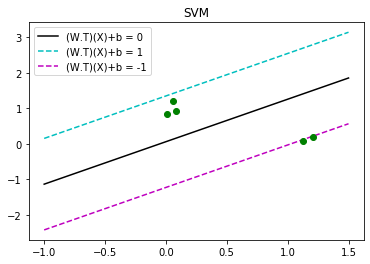

In [10]:

test = np.matrix([[0.0083,0.08,0.06,1.13,1.21],[0.85,0.93,1.2,0.07,0.20]])
print('Test Data:')
print(test)

y = np.matmul(w.T,test) 
# print(y)
for i in range(len(y)):
  y += b
print('\n Y values of the vectors:', end =" "), print(y)

for i in range(5):
  if y[0,i] > 0:
    y[0,i] = 1
  elif y[0,i] < 0:
    y[0,i] = -1
print('\n Index of the vectors:', end =" "), print(y)

bx = plt.subplot(111)
bx.plot(xx, yy, 'k-', label = '(W.T)(X)+b = 0')
bx.plot(xx, yy1, 'c--', label = '(W.T)(X)+b = 1')
bx.plot(xx, yy2, 'm--', label = '(W.T)(X)+b = -1')
bx.legend()

plt.plot(test[0, :], test[1, :], 'go')

plt.title('SVM')
plt.show()

Plotting and classifying the test data

In [0]:
# Part 2

**Part 2**

Kernel Function: $$ K(xi,xj) = e^{-\frac{(xi-xj)^T(xi-xj)}{(2\sigma^2)}}$$

In [0]:
kernel_matrix_2 = np.zeros((20,20))

# Exponential/Gaussian Kernel Matrices
def K_2(x1,x2,t1,t2):
    output = np.exp(-1*np.matmul((x1-x2).T,(x1-x2))/2.0)
    return output*t1*t2

# Exponential/Gaussian Kernel Function
def krn_2(x1,x2):
    output = np.exp(-1*np.matmul((x1-x2).T,(x1-x2))/2.0)
    return output[0,0]


In [0]:
for i in range(20):
    for j in range(20):
        kernel_matrix_2[i,j] = K_2(data[:,i],data[:,j],t[:, i],t[:, j])
kernel_matrix_2 = np.concatenate((kernel_matrix_2, t), axis=0)

In [0]:
b_2 = np.ones((21, 1))
b_2[20] = 0

x_2 = np.linalg.pinv(kernel_matrix_2)

a_2 = np.matmul(x_2, b_2)
# print(np.matmul(kernel_matrix_2,a))
# print(a)

In [15]:
m1_2 = []
M1_2 = []

for i in range (20):
  if a_2[i,0] > 0:
    m1_2.append(i)

m2_2 = []
for i in range (20):
  if a_2[i,0] > 0:
    m2_2.append(i)

for i in range (len(m1_2)):
  M1_2.append(a_2[m1_2[i],0])

print(M1)

[0.09562022458741647, 0.03183160773936618, 0.051099034279988895, 0.07008859227850905, 0.1137410919628345, 0.11344794247018417, 0.0793787901088289, 0.027759788406808632, 0.13320545919712373, 0.05468562885461885, 0.05111918065892555, 0.038722062918134084, 0.04536034602750523, 0.11006349635030008, 0.0327510066424998, 0.10982071280499112, 0.05834828584929598, 0.10226337312517661, 0.09048763936647947]


Printing the set **M1**

In [16]:
w1_2=w2_2=0

for i in range(len(m2_2)):
  #print (data[0,m2[i]]) 
  w1_2 += a_2[m2_2[i],0]*t[0,m2_2[i]]*data[0,m2_2[i]] 
  w2_2 += a_2[m2_2[i],0]*t[0,m2_2[i]]*data[1,m2_2[i]]
w_2 = np.array([[w1_2],[w2_2]])

print(w_2)

[[233875.24978856]
 [-91063.44835496]]


Printing the weignt matrix, **W**

In [17]:
si_2 = sj_2 = 0

for i in range(len(m1_2)):
  for j in range(len(m2_2)):
    sj_2 += a_2[m2_2[j],0]*t[0,m2_2[j]]*krn_2(data[:,j],data[:,i])
  si_2 += (t[0,m1_2[i]]-sj_2)
  sj_2 = 0
b_2 = si_2/len(m1_2)

print(b_2)

-146106.56584627734


Printing the bias, **b**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


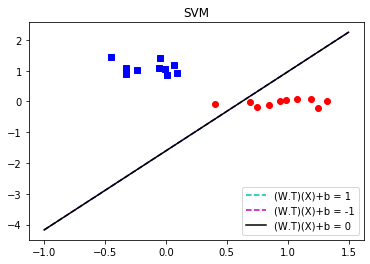

In [18]:
a_2 = -w_2[0] / w_2[1]
xx_2 = np.linspace(-1, 1.5)
yy_2 = a_2 * xx_2 - (b_2) / w_2[1]
yy1_2 = a_2 * xx_2 - (1+b_2) / w_2[1]
yy2_2 = a_2 * xx_2 - (-1+b_2) / w_2[1]

plt.plot(DATA1[0, :], DATA1[1, :], 'ro')
plt.plot(DATA2[0, :], DATA2[1, :], 'bs')

ax = plt.subplot(111)
ax.plot(xx_2, yy1_2, 'c--', label = '(W.T)(X)+b = 1')
ax.plot(xx_2, yy2_2, 'm--', label = '(W.T)(X)+b = -1')
ax.plot(xx_2, yy_2, 'k-', label = '(W.T)(X)+b = 0')
ax.legend()

plt.title('SVM')
plt.show()

Plotting the lines $$W^TX+b$$

The data is misclassified here. Hence the kernel function used here is inappropriate for this case.
Also, the three hyper planes are too close as +1 or -1 is too small compared to the value of the bias

Test Data:
[[0.0083 0.08   0.06   1.13   1.21  ]
 [0.85   0.93   1.2    0.07   0.2   ]]

 Y values of the vectors: [[-1. -1. -1.  1.  1.]]

 Index of the vectors: [[-1. -1. -1.  1.  1.]]


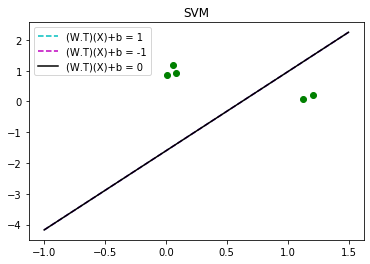

In [19]:
test = np.matrix([[0.0083,0.08,0.06,1.13,1.21],[0.85,0.93,1.2,0.07,0.20]])
print('Test Data:')
print(test)

y_2 = np.matmul(w_2.T,test) 
# print(y)
for i in range(len(y)):
  y_2 += b_2
print('\n Y values of the vectors:', end =" "), print(y)

for i in range(5):
  if y_2[0,i] > 0:
    y_2[0,i] = 1
  elif y_2[0,i] < 0:
    y_2[0,i] = -1
print('\n Index of the vectors:', end =" "), print(y)

bx = plt.subplot(111)
bx.plot(xx_2, yy1_2, 'c--', label = '(W.T)(X)+b = 1')
bx.plot(xx_2, yy2_2, 'm--', label = '(W.T)(X)+b = -1')
bx.plot(xx_2, yy_2, 'k-', label = '(W.T)(X)+b = 0')
bx.legend()

plt.plot(test[0, :], test[1, :], 'go')

plt.title('SVM')
plt.show()

Plotting the test data using this classifier